In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path
PARENT_PATH = Path(os.getcwd()).parent.absolute()

import numpy as np
import matplotlib.pyplot as plt

from ctorch.config import ComplexTorchConfig
from ctorch.data_access import DataClass
from ctorch.evaluation import CustomEvaluation
from ctorch.utils.constants import (
    PROCESSED_DIR, TRAIN, INPUT, TARGET, SAMPLE_FILE
)

FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

Load Config and initiate an object of DataClass for accessing data

In [3]:
config = ComplexTorchConfig()
config.CURRENT_PATH = PARENT_PATH

data = DataClass(config)

Initialize custom evaluation class for utility functions

In [4]:
eval = CustomEvaluation()

Load a training sample for visualization

In [5]:
input = os.path.join(data.data_path, PROCESSED_DIR, TRAIN, INPUT, SAMPLE_FILE)
target = os.path.join(data.data_path, PROCESSED_DIR, TRAIN, TARGET, SAMPLE_FILE)

Input MR Image in k-space

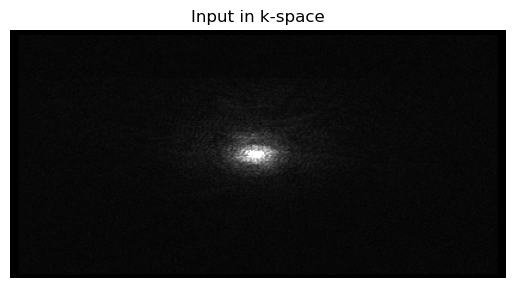

In [6]:
# Load k-space array
X = np.load(input).astype(np.csingle)
# Obtain normalized absolute k-space array
Y = eval.normalize(X)
# Plot
plt.imshow(Y, cmap="gray", vmax=.1)
plt.title("Input in k-space")
plt.axis("off")
plt.savefig(os.path.join("images/input_kspace"), bbox_inches="tight");

Input MR Image

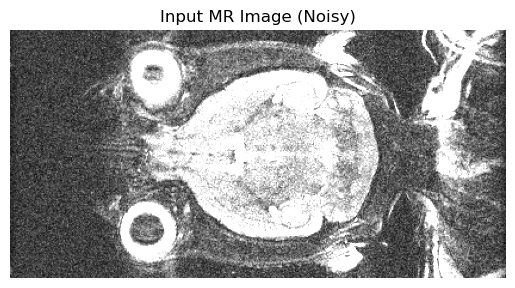

In [7]:
# Load k-space array
X = np.load(input).astype(np.csingle)
# Obtain MR Image by applying fourier transform
Y = eval.kspace_to_mri(X)
# Plot
plt.imshow(Y, cmap="gray", vmax=.1)
plt.title("Input MR Image (Noisy)")
plt.axis("off")
plt.savefig(os.path.join("images/input_mri"), bbox_inches="tight");

Target (Denoised) MR Image in k-space

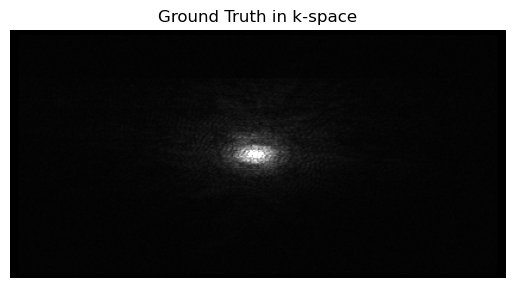

In [8]:
X = np.load(target).astype(np.csingle)
Y = eval.normalize(X)
plt.imshow(Y, cmap="gray", vmax=.1)
plt.title("Ground Truth in k-space")
plt.axis("off")
plt.savefig(os.path.join("images/target_kspace"), bbox_inches="tight");

Target (Denoised) MR Image

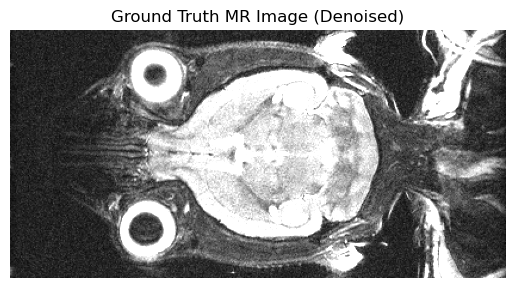

In [9]:
X = np.load(target).astype(np.csingle)
Y = eval.kspace_to_mri(X)
plt.imshow(Y, cmap="gray", vmax=.1)
plt.title("Ground Truth MR Image (Denoised)")
plt.axis("off")
plt.savefig(os.path.join("images/target_mri"), bbox_inches="tight");